# Experiment-1: CNN for Handwritten Digit Classification (MNIST)

In [3]:
##!pip install tensorflow
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

11490434/11490434 [==============================] - 10s 1us/step


In [5]:
# Data augmentation
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)

In [6]:
# Build CNN model
def build_cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', strides=(1,1), input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [7]:
# Train model on original data
#import numpy as np
model_original = build_cnn_model()
model_original.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
y_train_cat = np.array(y_train_cat)
x_train = np.array(x_train)
model_original.fit(x_train, y_train_cat, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 213s 125ms/step - loss: 0.1368 - accuracy: 0.9577 - val_loss: 0.0538 - val_accuracy: 0.9860
Epoch 2/5
1688/1688 [==============================] - 160s 95ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0403 - val_accuracy: 0.9892
Epoch 3/5
1688/1688 [==============================] - 127s 75ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0395 - val_accuracy: 0.9898
Epoch 4/5
1688/1688 [==============================] - 129s 76ms/step - loss: 0.0192 - accuracy: 0.9933 - val_loss: 0.0450 - val_accuracy: 0.9898
Epoch 5/5
1688/1688 [==============================] - 131s 78ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0413 - val_accuracy: 0.9902


In [ ]:
# Train model on augmented data
model_augmented = build_cnn_model()
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train_cat, test_size=0.1)
train_generator = datagen.flow(x_train_split, y_train_split, batch_size=32)
val_generator = datagen.flow(x_val_split, y_val_split, batch_size=32)
model_augmented.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_augmented.fit(train_generator, validation_data=val_generator, epochs=5,steps_per_epoch=len(train_generator), validation_steps=len(val_generator))

Epoch 1/5
1688/1688 [==============================] - ETA: 0s - loss: 0.2546 - accuracy: 0.9204

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9866 - loss: 0.0505
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9851 - loss: 0.0482


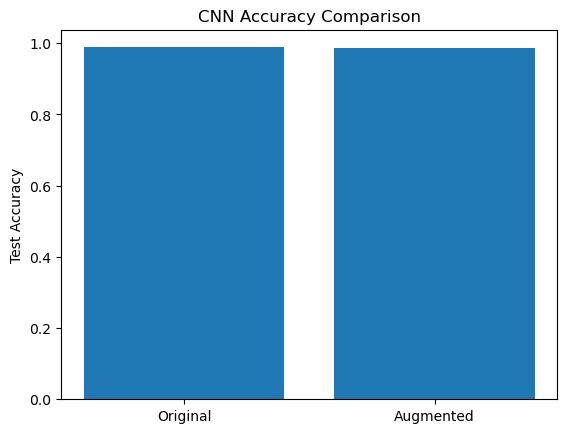

In [ ]:
# Evaluate models and compare
score_original = model_original.evaluate(x_test, y_test_cat)
score_augmented = model_augmented.evaluate(x_test, y_test_cat)

# Plotting accuracy
plt.bar(['Original', 'Augmented'], [score_original[1], score_augmented[1]])
plt.ylabel('Test Accuracy')
plt.title('CNN Accuracy Comparison')
plt.show()

# Experiment-2: DNN for Solving Polynomial Equation

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Generate and normalize data
x = np.linspace(-20, 20, 1000).reshape(-1, 1)
y = (5 * x**3 - 10 * x**2 - 20 * x + 10).reshape(-1, 1)

scaler_x = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler()
x_scaled = scaler_x.fit_transform(x)
y_scaled = scaler_y.fit_transform(y)

In [ ]:
# Split data
x_train_full, x_test, y_train_full, y_test = train_test_split(x_scaled, y_scaled, test_size=0.05)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.05)

In [ ]:
# Build and train DNN
dnn_model = Sequential([
    Dense(32, activation='relu', input_dim=1),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

dnn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = dnn_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2388 - mae: 0.4335 - val_loss: 0.0392 - val_mae: 0.1743
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0312 - mae: 0.1487 - val_loss: 0.0082 - val_mae: 0.0690
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - mae: 0.0650 - val_loss: 0.0015 - val_mae: 0.0273
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - mae: 0.0313 - val_loss: 9.9098e-04 - val_mae: 0.0238
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - mae: 0.0273 - val_loss: 5.4429e-04 - val_mae: 0.0164
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4034e-04 - mae: 0.0204 - val_loss: 4.0507e-04 - val_mae: 0.0137
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2498e-04 - mae: 0.0191 - val_loss: 2.5863e-04 - val_mae: 0.0097
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3856e-04 - mae: 0.0134 - val_loss: 2.4577e-04 - val_mae: 0.0099
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4

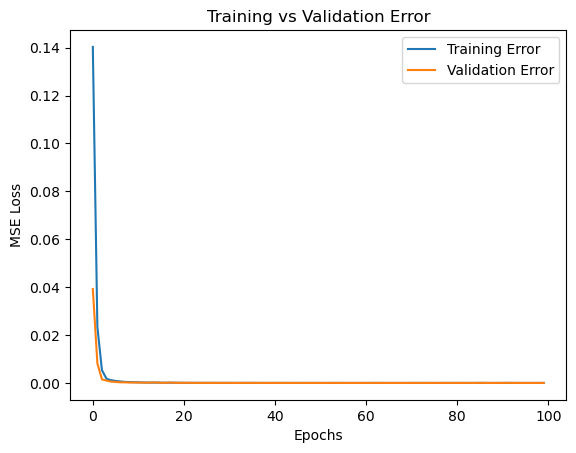

In [ ]:
# Plot error curves
plt.plot(history.history['loss'], label='Training Error')
plt.plot(history.history['val_loss'], label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training vs Validation Error')
plt.show()